In [1]:
# Description: Plot Figure 4 (Examples of barotropic/baroclinic velocities and kinetic energies).
# Author:      André Palóczy
# E-mail:      paloczy@gmail.com
# Date:        December/2020

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from xarray import open_dataset
from pandas import Timestamp
from pyspec.spectrum import block_avg, spec_error
from cmocean.cm import balance

In [3]:
def block_avgz(A, dts, Nblks):
    nz, nt = A.shape
    for k in range(nz):
        a = A[k, :]
        fg = np.isfinite(a)
        if not fg.any():
            S = np.vstack((S, Saa.f*np.nan))
            continue
        a[~fg] = np.nanmean(a)
        Saa, nblks = block_avg(a, dts, N=Nblks);
        if k==0:
            S = Saa.spec
        else:
            S = np.vstack((S, Saa.spec[np.newaxis, ...]))
    f = Saa.f

    dof = 2*nblks

    return f, dof, np.nanmean(S, axis=0)

In [4]:
plt.close('all')

head = "../../data_reproduce_figs/"
fname = 'OC25SA-Ad1rs5-10min_ensembles-nobinmap-bias-corrected.nc'

zcap = 17
ds = open_dataset(head+fname)
ds = ds.sel(dict(z=slice(0, zcap)))

In [5]:
# Calculate depth-averaged HKE and shear variance time series.
u, v, uz, vz, t, z = ds['u'], ds['v'], ds['uz'], ds['vz'], ds['t'], ds['z']
HKEx = 0.5*u**2
HKEy = 0.5*v**2
HKE = HKEx + HKEy
HKEbarx = HKEx.mean('z')
HKEbary = HKEy.mean('z')
HKEbar = HKE.mean('z')
Uzvarx = uz**2
Uzvary = vz**2
Uzvar = Uzvarx + Uzvary
Uzvarxbar = Uzvarx.mean('z')
Uzvarybar = Uzvary.mean('z')
Uzvarbar = Uzvar.mean('z')

In [6]:
# Calculate HKE and shear variance spectra at each depth, then average.
dts = 1/6/24 # [day]
Nblks = 2


f, dof, SHKEx = block_avgz(u.values, dts, Nblks)
f, dof, SHKEy = block_avgz(v.values, dts, Nblks)
f, dof, SUzx = block_avgz(uz.values, dts, Nblks)
f, dof, SUzy = block_avgz(vz.values, dts, Nblks)

alpha = 0.95
El_SHKEx, Eu_SHKEx = spec_error(SHKEx, dof/2, ci=alpha)
El_SHKEy, Eu_SHKEy = spec_error(SHKEy, dof/2, ci=alpha)
El_SUzx, Eu_SUzx = spec_error(SUzx, dof/2, ci=alpha)
El_SUzy, Eu_SUzy = spec_error(SUzy, dof/2, ci=alpha)

In [7]:
ubt = u.mean('z')
vbt = v.mean('z')
ubc = u - ubt
vbc = v - vbt

<ipython-input-8-fae0ac7d29ac>:15: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  cs1 = ax1.pcolormesh(t, z, ubc.values, vmin=-vmau, vmax=vmau, cmap=balance)
<ipython-input-8-fae0ac7d29ac>:16: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  cs2 = ax2.pcolormesh(t, z, vbc.values, vmin=-vmau, vmax=vmau, cmap=balance)
<ipython-input-8-fae0ac7d29ac>:79: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ax6.s

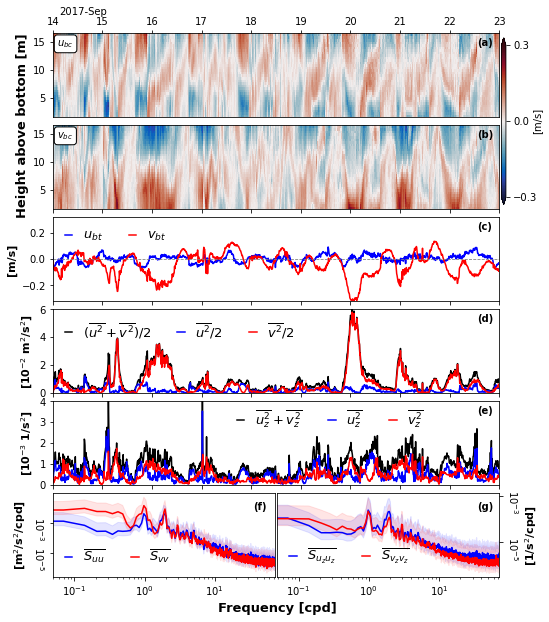

In [8]:
# Plotting.

vmau = 0.3
figsize = (8, 10)
shp = (6, 2)
fig = plt.figure(figsize=figsize)
ax1 = plt.subplot2grid(shp, (0, 0), colspan=2)
ax2 = plt.subplot2grid(shp, (1, 0), colspan=2)
ax3 = plt.subplot2grid(shp, (2, 0), colspan=2)
ax4 = plt.subplot2grid(shp, (3, 0), colspan=2)
ax5 = plt.subplot2grid(shp, (4, 0), colspan=2)
ax6 = plt.subplot2grid(shp, (5, 0), colspan=1)
ax7 = plt.subplot2grid(shp, (5, 1), colspan=1)

cs1 = ax1.pcolormesh(t, z, ubc.values, vmin=-vmau, vmax=vmau, cmap=balance)
cs2 = ax2.pcolormesh(t, z, vbc.values, vmin=-vmau, vmax=vmau, cmap=balance)
ax3.plot(t, ubt, color='b', label=r"$u_{bt}$")
ax3.plot(t, vbt, color='r', label=r"$v_{bt}$")
ax3.legend(frameon=False, ncol=2, loc='upper left', fontsize=13, handlelength=0.6)

fac = 1e2
ax4.plot(t, HKEbar*fac, color='k', label=r'$(\overline{u^2} + \overline{v^2})/2$')
ax4.plot(t, HKEbarx*fac, color='b', label=r'$\overline{u^2}/2$')
ax4.plot(t, HKEbary*fac, color='r', label=r'$\overline{v^2}/2$')
ax4.legend(frameon=False, ncol=3, fontsize=13, handlelength=0.6)

fac = 1e3
ax5.plot(t, Uzvarbar*fac, color='k', label=r'$\overline{u_z^2} + \overline{v_z^2}$')
ax5.plot(t, Uzvarxbar*fac, color='b', label=r'$\overline{u_z^2}$')
ax5.plot(t, Uzvarybar*fac, color='r', label=r'$\overline{v_z^2}$')
ax5.legend(frameon=False, ncol=3, loc=(0.4, 0.6), fontsize=13, handlelength=0.6)

ax6.loglog(f, SHKEx, 'b', label=r'$\overline{S_{uu}}$')
ax6.loglog(f, SHKEy, 'r', label=r'$\overline{S_{vv}}$')
ax6.fill_between(f, El_SHKEx, y2=Eu_SHKEx, color='b', alpha=0.1)
ax6.fill_between(f, El_SHKEy, y2=Eu_SHKEy, color='r', alpha=0.1)
ax6.legend(frameon=False, ncol=2, loc='lower left', fontsize=13, handlelength=0.6)

ax7.loglog(f, SUzx, 'b', label=r'$\overline{S_{u_zu_z}}$')
ax7.loglog(f, SUzy, 'r', label=r'$\overline{S_{v_zv_z}}$')
ax7.fill_between(f, El_SUzx, y2=Eu_SUzx, color='b', alpha=0.1)
ax7.fill_between(f, El_SUzy, y2=Eu_SUzy, color='r', alpha=0.1)
ax7.legend(frameon=False, ncol=2, loc='lower left', fontsize=13, handlelength=0.6)

ax1.xaxis.tick_top()
ax1.xaxis.set_label_position('top')
# ax1.xaxis.set_tick_params(rotation=10)
ax2.xaxis.set_ticklabels([])
ax3.xaxis.set_ticklabels([])
ax4.xaxis.set_ticklabels([])
ax5.xaxis.set_ticklabels([])
# ax6.xaxis.set_ticklabels([])
ax7.yaxis.set_ticks_position('right')
ax7.yaxis.set_label_position('right')
ax6.yaxis.set_tick_params(rotation=-90)
ax7.yaxis.set_tick_params(rotation=-90)

bb = dict(boxstyle='round', ec='k', fc='w')
xt, yt = 0.01, 0.85
ax1.text(xt, yt, r"$u_{bc}$", transform=ax1.transAxes, bbox=bb)
ax2.text(xt, yt, r"$v_{bc}$", transform=ax2.transAxes, bbox=bb)

cbaxpos = [1.005, -1.05, 0.01, 2]
tickrot = 0
cbax12 = ax1.inset_axes(cbaxpos)
cb1 = fig.colorbar(cs1, cax=cbax12, extend="both")
cb1.set_ticks([-vmau, 0, vmau])
cb1.set_label(r"[m/s]", labelpad=-5)

tl, tr = Timestamp("2017-09-14"), Timestamp("2017-09-23")
ax1.set_xlim(tl, tr)
ax2.set_xlim(tl, tr)
ax3.set_xlim(tl, tr)
ax4.set_xlim(tl, tr)
ax5.set_xlim(tl, tr)
ax3.set_ylim(-0.32, 0.32)
ax4.set_ylim(0, 6)
ax5.set_ylim(0, 4)
ax6.set_xlim(f[0], f[-1])
ax7.set_xlim(f[0], f[-1])
ax3.axhline(color="gray", linewidth=0.8, linestyle="--")

ax2.set_ylabel(r"Height above bottom [m]", fontsize=13, y=1, fontweight='bold')
ax3.set_ylabel(r"[m/s]", fontsize=11, fontweight='bold')
ax4.set_ylabel(r"[10$^{-2}$ m$^2$/s$^2$]", fontsize=11, fontweight='bold')
ax5.set_ylabel(r"[10$^{-3}$ 1/s$^2$]", fontsize=11, fontweight='bold')
ax6.set_ylabel(r"[m$^2$/s$^2$/cpd]", fontsize=11, fontweight='bold')
ax7.set_ylabel(r"[1/s$^2$/cpd]", fontsize=11, fontweight='bold')
ax7.set_xlabel(r"Frequency [cpd]", fontsize=13, fontweight='bold', x=0)

xts = np.arange(tl.day, tr.day + 1)
ax1.xaxis.set_ticklabels(xts)
if tl.month==9:
    mo = "Sep"
elif tl.month==10:
    mo = "Oct"
ax1.text(0.015, 1.22, "%d-%s"%(tl.year, mo), transform=ax1.transAxes)

xt, yt = 0.95, 0.85
xt2, yt2 = 0.90, 0.80
ax1.text(xt, yt, r"(a)", fontweight="black", transform=ax1.transAxes)
ax2.text(xt, yt, r"(b)", fontweight="black", transform=ax2.transAxes)
ax3.text(xt, yt, r"(c)", fontweight="black", transform=ax3.transAxes)
ax4.text(xt, yt, r"(d)", fontweight="black", transform=ax4.transAxes)
ax5.text(xt, yt, r"(e)", fontweight="black", transform=ax5.transAxes)
ax6.text(xt2, yt2, r"(f)", fontweight="black", transform=ax6.transAxes)
ax7.text(xt2, yt2, r"(g)", fontweight="black", transform=ax7.transAxes)

fig.subplots_adjust(hspace=0.1, wspace=0.01)

In [9]:
fig.savefig("fig04.png", dpi=300, bbox_inches="tight")
plt.show()